In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [3]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [4]:
# Input readable date
start_readable_date = "01-06-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-06-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1748710800
1751302799


In [6]:
# Refer ke path data
ref_data = db.reference('/auto_weather_stat/id-03/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data = ref_data.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data = query_data.get()


In [9]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data:
    cuaca = pd.DataFrame.from_dict(results_data, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca.columns:
        cuaca.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature   timestamp  volt
1748710856  25.35366     97.79   1013.13        25.73  1748710856  4.12
1748710916  25.35194     97.78   1013.22        25.73  1748710916  4.11
1748710976  25.28523     97.74   1013.11        25.67  1748710976  4.12
1748711036  25.28832     97.70   1013.15        25.68  1748711036  4.12
1748711096  25.25153     97.66   1013.16        25.65  1748711096  4.12


In [10]:
cuaca.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1751302237,24.76216,91.65,1011.23,26.23,1751302237,4.10
1751302297,24.75958,91.69,1011.23,26.22,1751302297,4.10
1751302357,24.77312,91.71,1011.26,26.23,1751302357,4.10
1751302417,24.76688,91.73,1011.21,26.22,1751302417,4.10
1751302477,24.74527,91.72,1011.22,26.20,1751302477,4.10
1751302537,24.74968,91.69,1011.19,26.21,1751302537,4.10
1751302597,24.74786,91.68,1011.20,26.21,1751302597,4.10
1751302657,24.74238,91.65,1011.21,26.21,1751302657,4.10
1751302718,24.73873,91.63,1011.15,26.21,1751302718,4.10
1751302778,24.71787,91.57,1011.09,26.20,1751302778,4.11


In [11]:
cuaca['timestamp']= cuaca['timestamp'].astype(int)
cuaca.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1751302237,24.76216,91.65,1011.23,26.23,1751302237,4.10
1751302297,24.75958,91.69,1011.23,26.22,1751302297,4.10
1751302357,24.77312,91.71,1011.26,26.23,1751302357,4.10
1751302417,24.76688,91.73,1011.21,26.22,1751302417,4.10
1751302477,24.74527,91.72,1011.22,26.20,1751302477,4.10
1751302537,24.74968,91.69,1011.19,26.21,1751302537,4.10
1751302597,24.74786,91.68,1011.20,26.21,1751302597,4.10
1751302657,24.74238,91.65,1011.21,26.21,1751302657,4.10
1751302718,24.73873,91.63,1011.15,26.21,1751302718,4.10
1751302778,24.71787,91.57,1011.09,26.20,1751302778,4.11


In [12]:
# Konversi timestamp ke datetime dalam format UTC
cuaca['timestamp'] = pd.to_datetime(cuaca['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca['timestamp'] = cuaca['timestamp'].dt.tz_convert('Asia/Jakarta')

In [13]:
cuaca.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [14]:
cuaca.head(10)

,dew,humidity,pressure,temperature,timestamp,volt
1748710856,25.35366,97.79,1013.13,25.73,2025-06-01 00:00:56+07:00,4.12
1748710916,25.35194,97.78,1013.22,25.73,2025-06-01 00:01:56+07:00,4.11
1748710976,25.28523,97.74,1013.11,25.67,2025-06-01 00:02:56+07:00,4.12
1748711036,25.28832,97.70,1013.15,25.68,2025-06-01 00:03:56+07:00,4.12
1748711096,25.25153,97.66,1013.16,25.65,2025-06-01 00:04:56+07:00,4.12
1748711156,25.19480,97.62,1013.17,25.60,2025-06-01 00:05:56+07:00,4.12
1748711216,25.17278,97.55,1013.26,25.59,2025-06-01 00:06:56+07:00,4.12
1748711276,25.17930,97.53,1013.18,25.60,2025-06-01 00:07:56+07:00,4.12
1748711336,25.13906,97.47,1013.21,25.57,2025-06-01 00:08:56+07:00,4.11
1748711396,25.10190,97.37,1013.18,25.55,2025-06-01 00:09:56+07:00,4.12


In [16]:
datacuaca = cuaca

Visualisasi missing values untuk datacuaca:


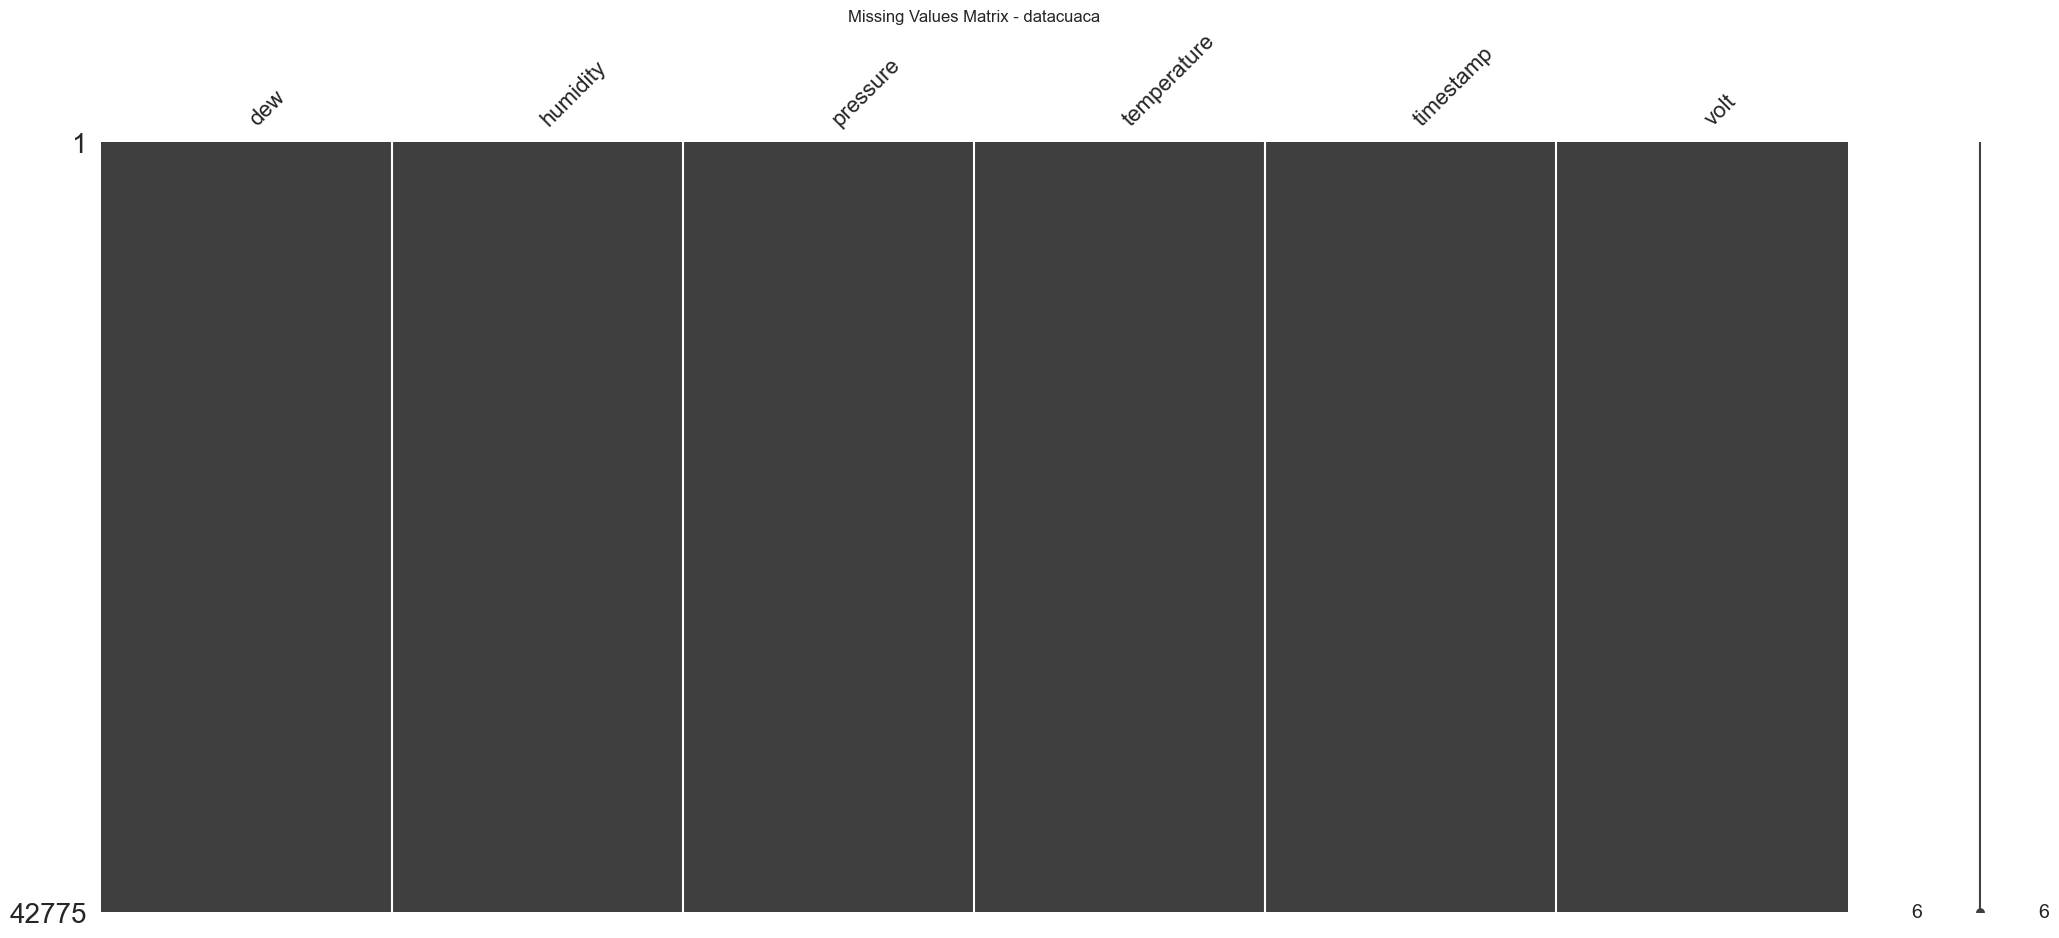

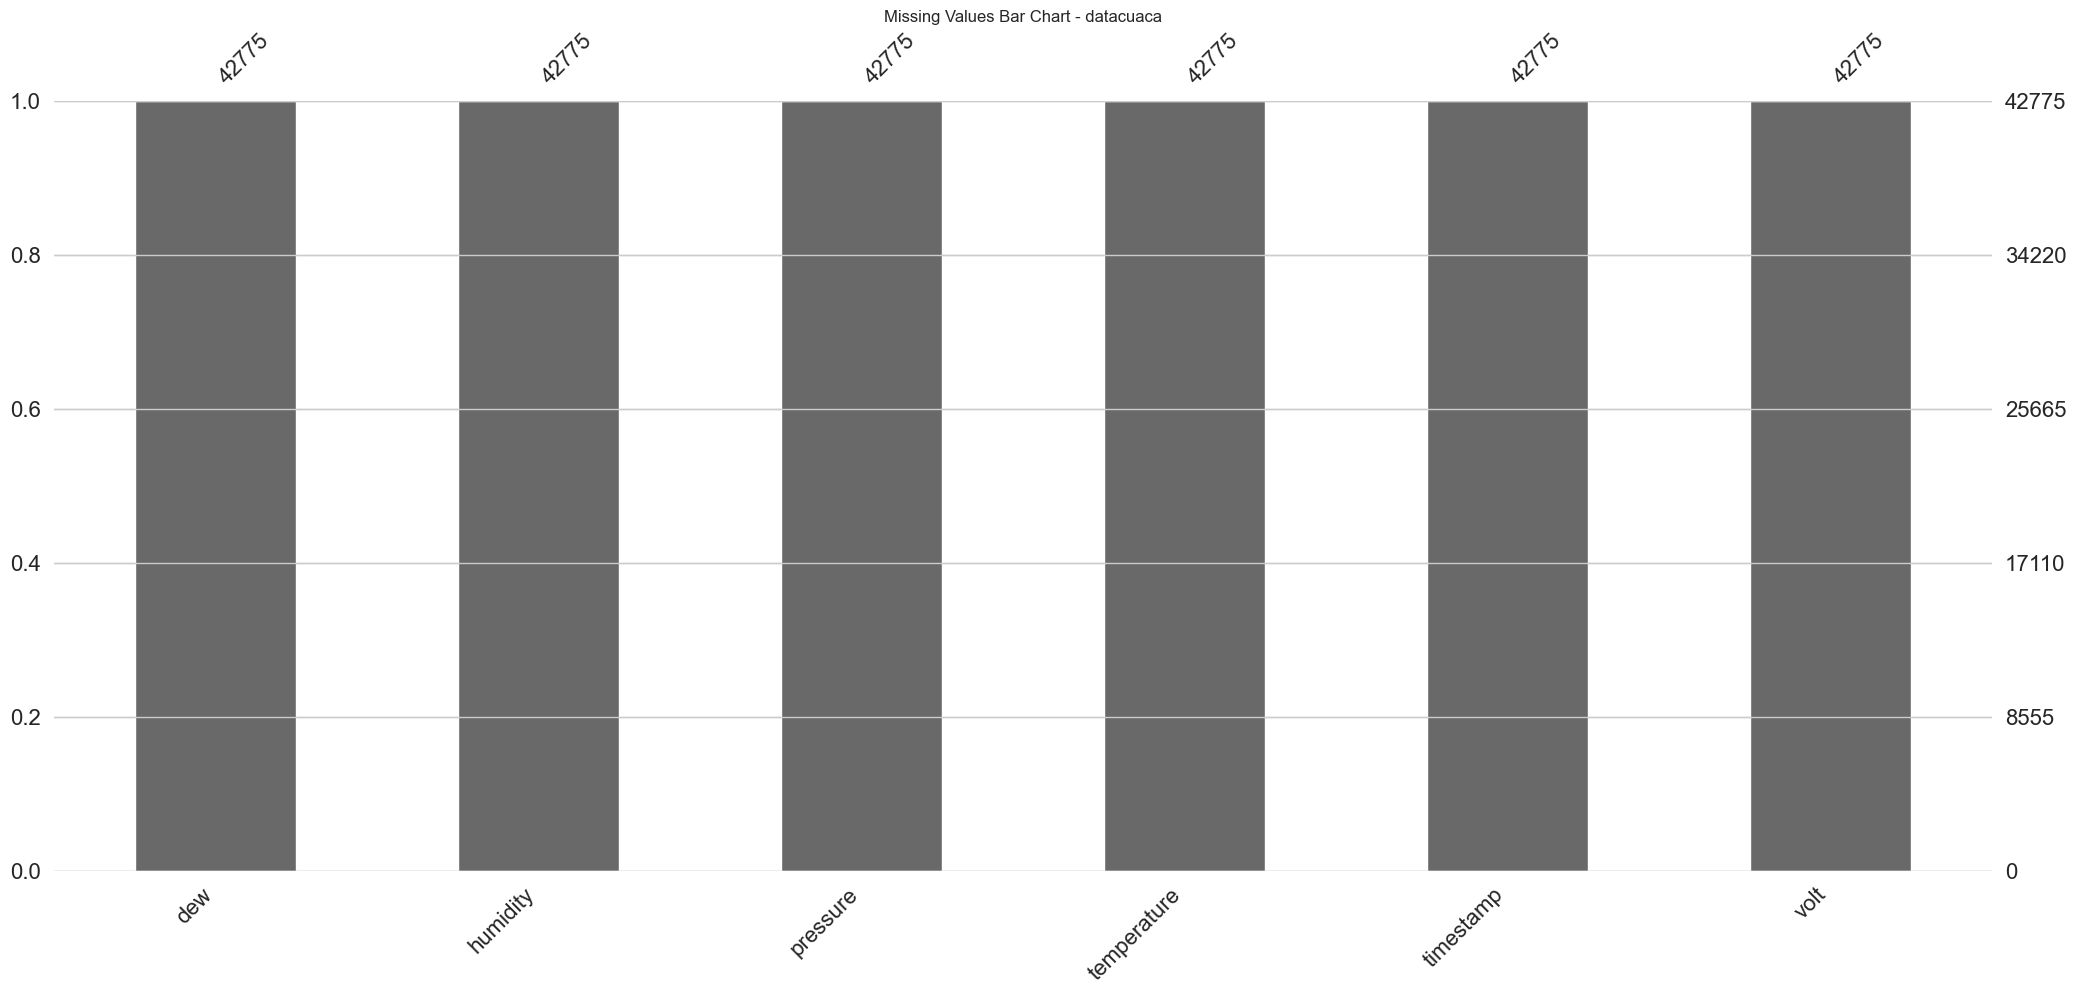

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


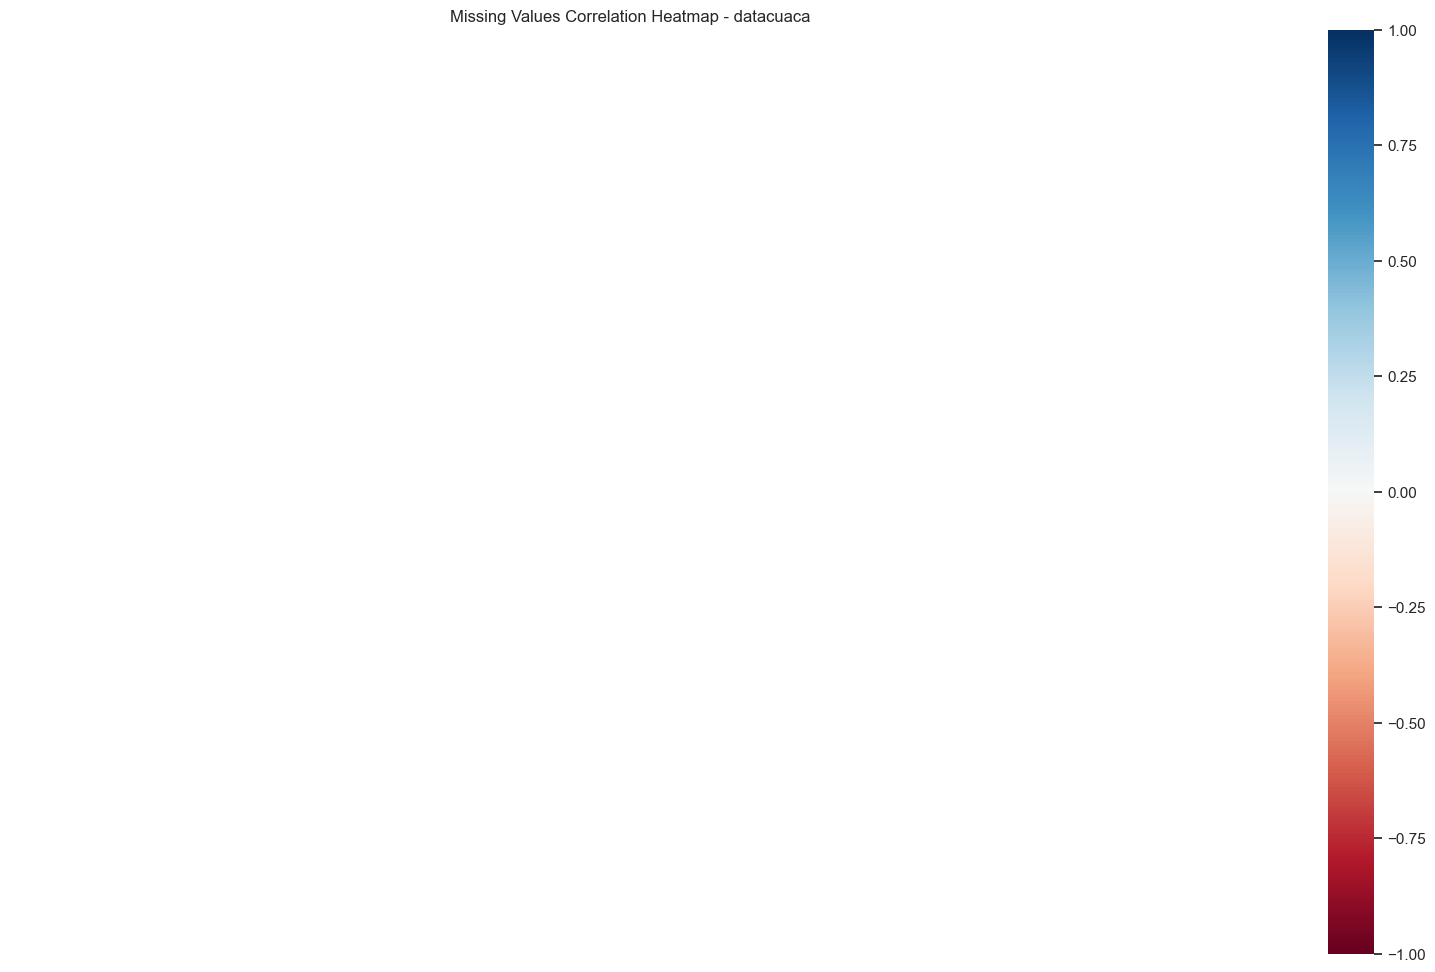

In [17]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

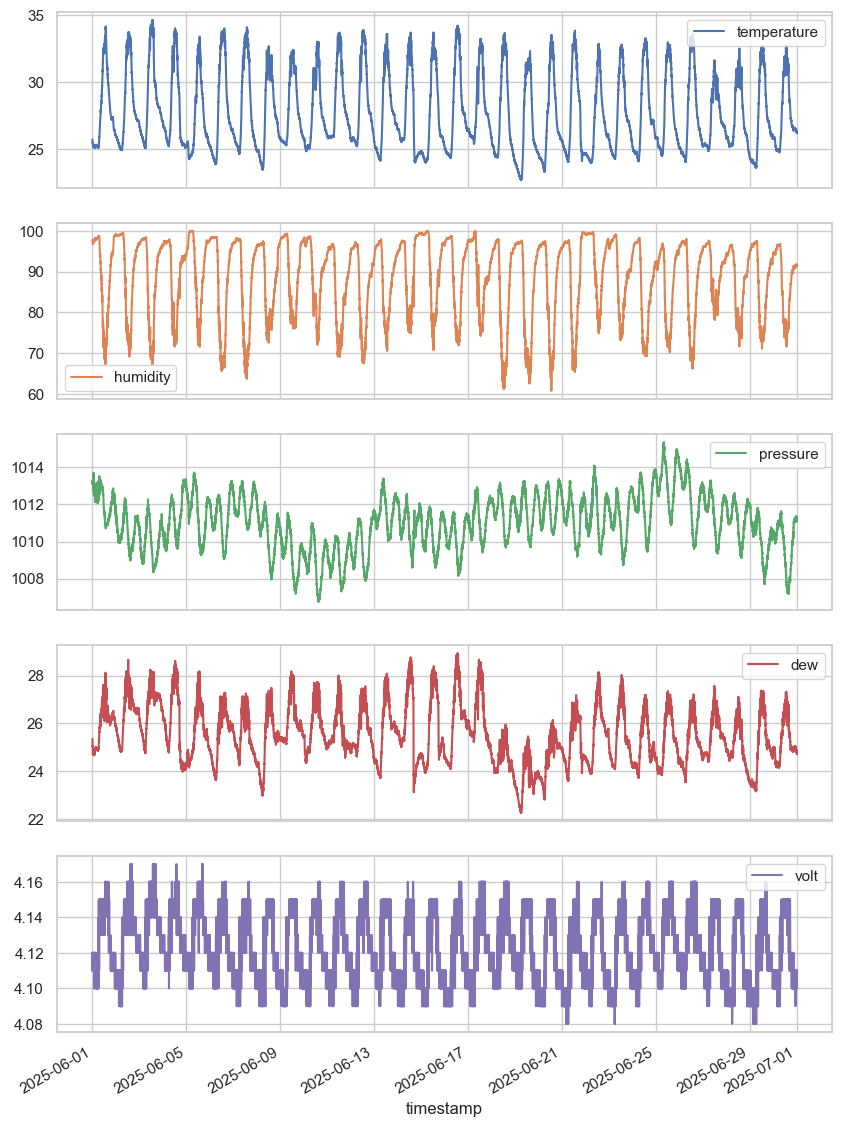

In [18]:
datacuaca.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [19]:
# Ekspor datacuaca2 ke CSV dengan delimiter titik koma (;)
datacuaca.to_csv('datacuacaJuni.csv', sep=',', index=False)
print("DataFrame datacuaca2 berhasil diekspor")

DataFrame datacuaca2 berhasil diekspor


In [20]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

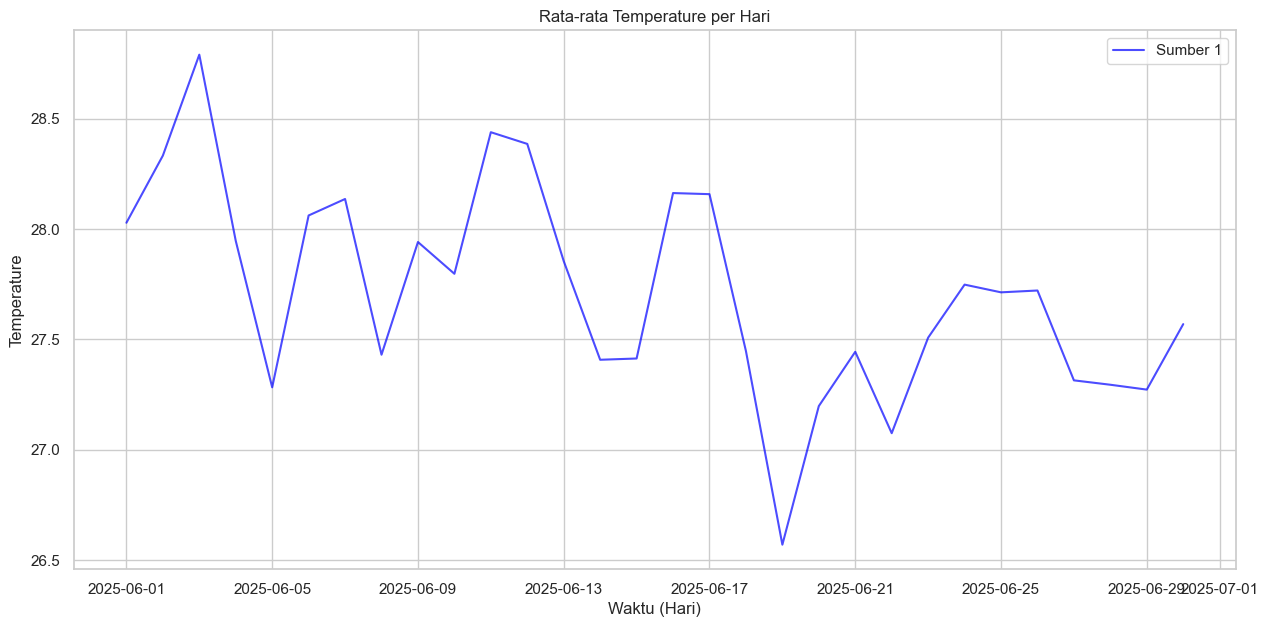

In [22]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
datacuaca['day'] = datacuaca['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat

# Menghitung rata-rata per hari untuk kolom yang dipilih
datacuaca_daily = datacuaca.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_daily['day'], datacuaca_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

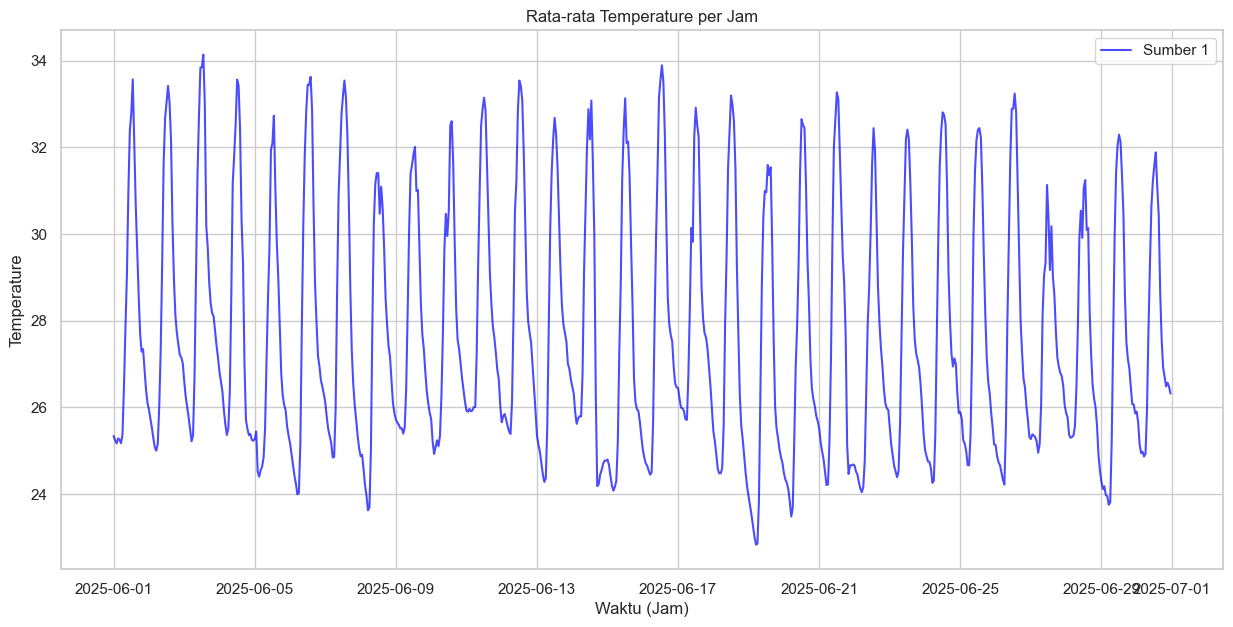

In [23]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat

# Menghitung rata-rata per jam untuk kolom yang dipilih
datacuaca_hourly = datacuaca.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata variabel
datacuaca_hourly = datacuaca.groupby('hour')['temperature'].mean().reset_index()

# Pastikan data sudah terurut berdasarkan waktu
datacuaca_hourly = datacuaca_hourly.sort_values(by='hour').reset_index(drop=True)

# Menyiapkan data untuk model
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - lookback - forecast_horizon):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback:i + lookback + forecast_horizon])
    return np.array(X), np.array(y)

In [54]:
# Normalisasi data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(datacuaca_hourly[['temperature']].values)

In [71]:
# Membuat dataset
lookback = 24*1  # Menggunakan data masa lalu
forecast_horizon = 24*3  # Memprediksi data masa depan
X, y = create_sequences(temperature_scaled, lookback, forecast_horizon)

In [72]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Membangun model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(lookback, 1), return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(forecast_horizon),
])

d:\conda_env\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
# Mengatur optimizer dengan learning rate khusus
optimizer = Adam(learning_rate=0.001)  # Ubah nilai learning rate sesuai kebutuhan
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

In [75]:
# Melatih model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.0000e+00 - loss: 0.2447 - val_accuracy: 0.0000e+00 - val_loss: 0.2374
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.2294 - val_accuracy: 0.0000e+00 - val_loss: 0.2089
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.1916 - val_accuracy: 0.0000e+00 - val_loss: 0.1583
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.1435 - val_accuracy: 0.0000e+00 - val_loss: 0.1204
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.1133 - val_accuracy: 0.0000e+00 - val_loss: 0.0957
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0931 - val_accuracy: 0.0000e+00 - val_loss: 0.0810
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0798 - val_accuracy: 0.0000e+00 - val_loss: 0.0723
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy:

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


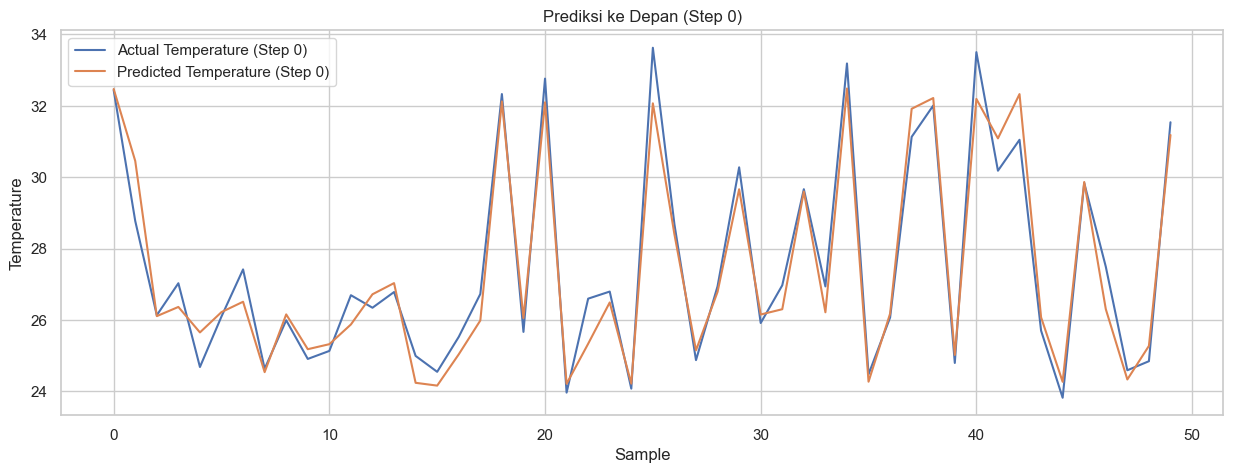

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 72)             │         2,376 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,130 (637.23 KB)

 Trainable params: 54,376 (212.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,754 (424.82 KB)

In [76]:
# Membuat prediksi
predictions = model.predict(X_test)

# Membalikkan normalisasi untuk interpretasi hasil
# Reshape predictions dan y_test agar menjadi 2D sebelum inverse_transform
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Menampilkan hasil prediksi vs data aktual untuk langkah pertama (step 0 dari 6 jam ke depan)
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled[:50, 0], label='Actual Temperature (Step 0)')
plt.plot(predictions_rescaled[:50, 0], label='Predicted Temperature (Step 0)')
plt.legend()
plt.title('Prediksi ke Depan (Step 0)')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.show()
model.summary()

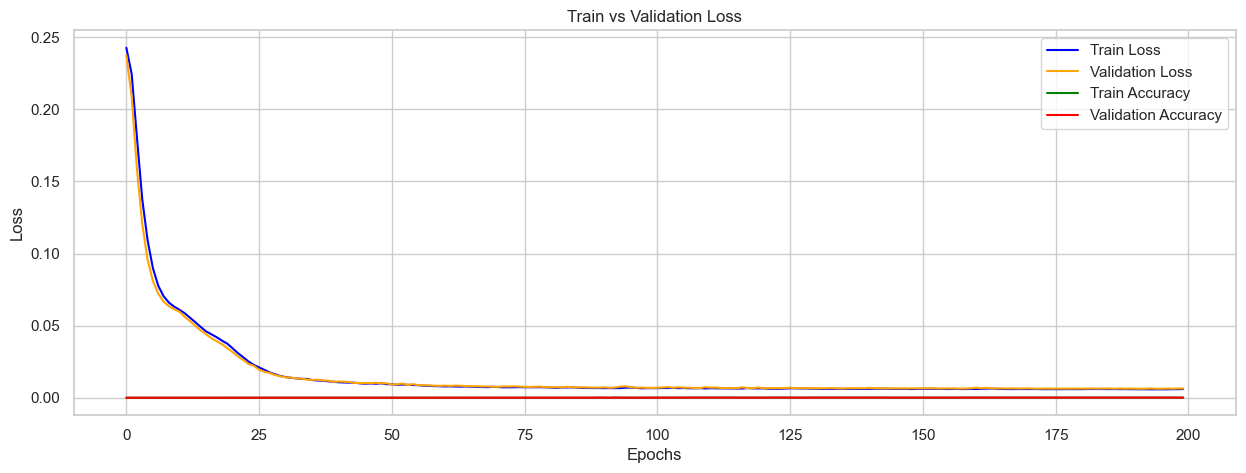

In [77]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediksi suhu untuk jam ke depan:
Jam ke-1: 25.50°C
Jam ke-2: 25.38°C
Jam ke-3: 25.22°C
Jam ke-4: 24.87°C
Jam ke-5: 24.87°C
Jam ke-6: 24.88°C
Jam ke-7: 25.83°C
Jam ke-8: 27.06°C
Jam ke-9: 28.37°C
Jam ke-10: 30.05°C
Jam ke-11: 31.59°C
Jam ke-12: 32.39°C
Jam ke-13: 32.82°C
Jam ke-14: 32.44°C
Jam ke-15: 31.91°C
Jam ke-16: 30.53°C
Jam ke-17: 29.28°C
Jam ke-18: 28.12°C
Jam ke-19: 27.14°C
Jam ke-20: 26.41°C
Jam ke-21: 26.29°C
Jam ke-22: 25.94°C
Jam ke-23: 25.88°C
Jam ke-24: 25.68°C
Jam ke-25: 25.48°C
Jam ke-26: 25.29°C
Jam ke-27: 25.00°C
Jam ke-28: 24.64°C
Jam ke-29: 24.52°C
Jam ke-30: 24.86°C
Jam ke-31: 25.65°C
Jam ke-32: 26.96°C
Jam ke-33: 28.53°C
Jam ke-34: 29.98°C
Jam ke-35: 31.19°C
Jam ke-36: 32.21°C
Jam ke-37: 32.62°C
Jam ke-38: 32.45°C
Jam ke-39: 31.57°C
Jam ke-40: 30.58°C
Jam ke-41: 29.16°C
Jam ke-42: 27.96°C
Jam ke-43: 27.04°C
Jam ke-44: 26.48°C
Jam ke-45: 26.08°C
Jam ke-46: 26.02°C
Jam ke-47: 25.74°C
Jam ke-48: 25.62°C
Jam ke-49: 25.31°C
Jam ke

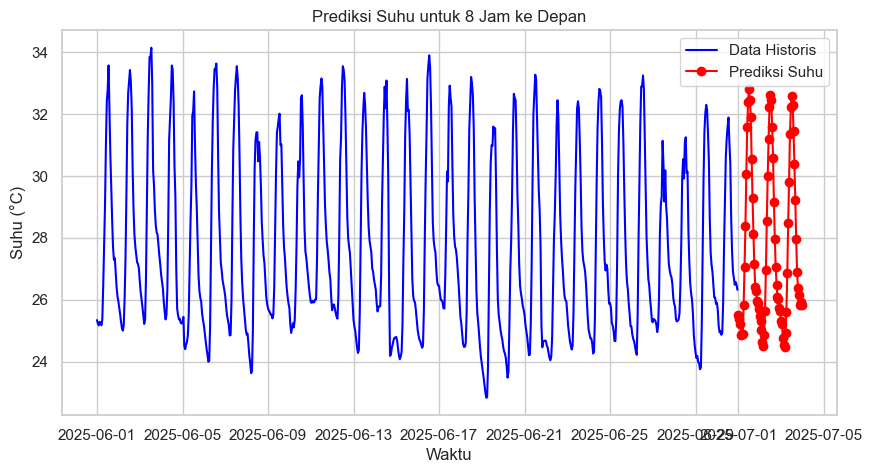

In [78]:
# Mengambil data terakhir dari dataset untuk pengujian
last_data = temperature_scaled[-lookback:]

# Mengubah bentuk data agar sesuai dengan input model
last_data = last_data.reshape(1, lookback, 1)

# Membuat prediksi
new_predictions = model.predict(last_data)

# Membalikkan normalisasi untuk mendapatkan nilai suhu aktual
new_predictions_rescaled = scaler.inverse_transform(new_predictions)

# Menampilkan hasil prediksi
print("Prediksi suhu untuk jam ke depan:")
for i, temp in enumerate(new_predictions_rescaled[0]):
    print(f"Jam ke-{i+1}: {temp:.2f}°C")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 5))

# Plot data historis
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly['temperature'], label='Data Historis', color='blue')

# Menyiapkan sumbu x untuk prediksi
last_hour = datacuaca_hourly['hour'].iloc[-1]
prediction_hours = pd.to_datetime([last_hour + pd.DateOffset(hours=i) for i in range(1, forecast_horizon + 1)])

# Plot prediksi
plt.plot(prediction_hours, new_predictions_rescaled[0], label='Prediksi Suhu', color='red', marker='o')

plt.title('Prediksi Suhu untuk 8 Jam ke Depan')
plt.xlabel('Waktu')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Menyimpan model ke dalam format SavedModel
model.save('model_cuaca')

print("Model berhasil diekspor ke direktori 'model_cuaca'")